# **Employee Burnout Analysis & Prediction**

### Project Overview

Employee burnout is a state of physical, emotional, and mental exhaustion caused by prolonged stress and overwork. It often results in decreased productivity, lack of motivation, and feelings of helplessness or cynicism. Common signs include chronic fatigue, irritability, and a sense of detachment from work. In today's fast-paced world, it is really important to recognize and address the signs of burnout in order to maintain the health and well-being of employees.
In this project, we are going to analyze a dataset which contains various factors that may contribute burnout such as workload, mental fatigue and work-life balance. By analyzing this dataset, we can develop a model to identify individuals who may be at risk of burnout. By proactively addressing these risk factors, organizations can help prevent burnout and promote the well-being of their employees.

### Dataset Overview

The dataset used in this project is from Kaggle. This dataset consists of 9 columns as follows:


* **Employee ID:** The unique ID allocated for each employee (example: fffe390032003000)
* **Date of Joining:** The date-time when the employee has joined the organization (example: 2008-12-30)
* **Gender:** The gender of the employee (Male/Female)
* **Company** Type: The type of company where the employee is working (Service/Product)
* **WFH Setup Available:** Is the work from home facility available for the employee (Yes/No)
* **Designation:** The designation of the employee of work in the organization. In the range of [0.0, 5.0] bigger is higher designation
* **Resource Allocation:** The amount of resource allocated to the employee to work, ie. number of working hours. In the range of [1.0, 10.0] (higher means more resource)
* **Mental Fatigue Score:** The level of fatigue mentally the employee is facing. In the range of [0.0, 10.0] where 0.0 means no fatigue and 10.0 means completely fatigue.
* **Burn Rate:** The value we need to predict for each employee telling the rate of Burn out while working. In the range of [0.0, 1.0] where the higher the value is more is the burn out.





## Importing Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Loading Dataset

In [2]:
df = pd.read_excel('dataset/employee_burnout.xlsx')
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [179]:
df.shape

(22750, 9)

In [180]:
df.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


### Checking Null & Duplicate Values

In [182]:
df.isnull().sum()

,0
Employee ID,0
Date of Joining,0
Gender,0
Company Type,0
WFH Setup Available,0
Designation,0
Resource Allocation,1381
Mental Fatigue Score,2117
Burn Rate,1124


In [183]:
df.isnull().sum().values.sum()

4622

In [184]:
df['Employee ID'].duplicated().sum()

0

## Exploratory Data Analysis (EDA)


### Deleting Null Values

In [185]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18590 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           18590 non-null  object        
 1   Date of Joining       18590 non-null  datetime64[ns]
 2   Gender                18590 non-null  object        
 3   Company Type          18590 non-null  object        
 4   WFH Setup Available   18590 non-null  object        
 5   Designation           18590 non-null  int64         
 6   Resource Allocation   18590 non-null  float64       
 7   Mental Fatigue Score  18590 non-null  float64       
 8   Burn Rate             18590 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.4+ MB


In [186]:
df.shape

(18590, 9)

In [187]:
df.corr(numeric_only = True)['Burn Rate'][:-1]

,Burn Rate
Designation,0.736412
Resource Allocation,0.855005
Mental Fatigue Score,0.944389


### Deleting Irrelevant Columns

In [188]:
df = df.drop(['Employee ID', 'Date of Joining'], axis = 1)
df.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52
5,Male,Product,Yes,2,4.0,3.6,0.29


### Analysing the Categorical Variables

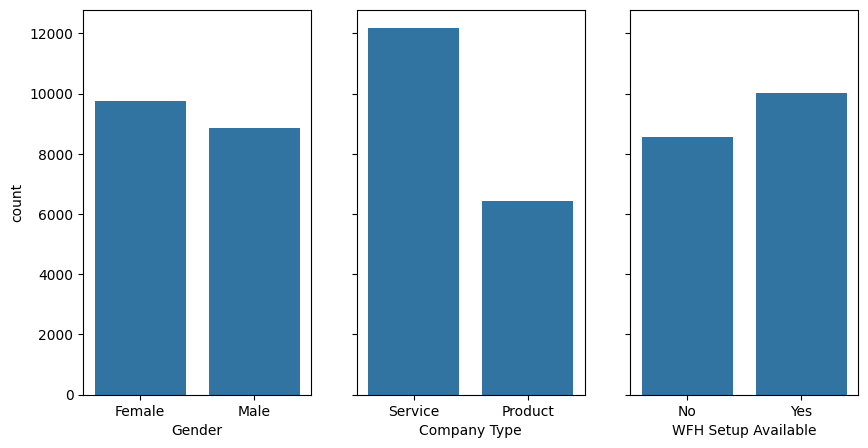

In [189]:
categorical_columns = df.select_dtypes(object).columns
fig, ax = plt.subplots(nrows = 1, ncols = len(categorical_columns), sharey = True, figsize = (10, 5))
for i, c in enumerate(categorical_columns):
  sns.countplot(x = c, data = df, ax = ax[i])
plt.show()

### One-Hot Encoding for Categorical Features

In [190]:
if all(col in df.columns for col in ['Company Type', 'WFH Setup Available', 'Gender']):
  df = pd.get_dummies(df, columns = ['Company Type', 'WFH Setup Available', 'Gender'], drop_first = True)
  df.head()
  encoded_columns = df.columns

## Data Preprocessing

In [191]:
# Split df into X and y
X = df.drop('Burn Rate', axis = 1)
y = df['Burn Rate']

In [192]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 1)

In [193]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

## Model Building & Model Evaluation

### 1. Linear Regression

In [194]:
# Building the model
linear_model = LinearRegression()

In [195]:
# Training the model
linear_model.fit(X_train, y_train)

LinearRegression()

In [196]:
# Making the predictions
y_pred = linear_model.predict(X_test)

In [197]:
# Linear Regression Model Performance Metrics

# Calculate Mean Squared Error
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", MSE)

# Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error:", RMSE)

# Calculate Mean Absolute Error
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

# Calculate R-Squared Score
R2 = r2_score(y_test, y_pred)
R2_percentage = R2 * 100
print(f"R-Squared Score: {R2_percentage:.2f} %")

Mean Squared Error: 0.0031625756229926656
Root Mean Squared Error: 0.05623678176240765
Mean Absolute Error: 0.04605840467455548
R-Squared Score: 91.82 %


### 2. Support Vector Machine (Linear Kernel)

In [198]:
# from sklearn.svm import SVR
# Building the model
svm_model = SVR(kernel = 'linear')

In [199]:
# Training the model
svm_model.fit(X_train, y_train)

SVR(kernel='linear')

In [200]:
# Making the predictions
y_pred = svm_model.predict(X_test)

In [201]:
# SVM (Linear Kernel) Model Performance Metrics

# Calculate Mean Squared Error
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", MSE)

# Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error:", RMSE)

# Calculate Mean Absolute Error
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

# Calculate R-Squared Score
R2 = r2_score(y_test, y_pred)
R2_percentage = R2 * 100
print(f"R-Squared Score: {R2_percentage:.2f} %")

Mean Squared Error: 0.0033274132309152465
Root Mean Squared Error: 0.05768373454376239
Mean Absolute Error: 0.048283298033743836
R-Squared Score: 91.40 %


### 3. K-Nearest Neighbors Regression (KNN)

In [202]:
# from sklearn.neighbors import KNeighborsRegressor
# Building the model
knn_model = KNeighborsRegressor(n_neighbors = 14)

In [203]:
# Training the model
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=14)

In [204]:
# Making the predictions
y_pred = knn_model.predict(X_test)

In [205]:
# KNN Model Performance Metrics

# Calculate Mean Squared Error
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", MSE)

# Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print("Root Mean Squared Error:", RMSE)

# Calculate Mean Absolute Error
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

# Calculate R-Squared Score
R2 = r2_score(y_test, y_pred)
R2_percentage = R2 * 100
print(f"R-Squared Score: {R2_percentage:.2f} %")

Mean Squared Error: 0.0031401608007377234
Root Mean Squared Error: 0.05603713769222803
Mean Absolute Error: 0.044780796126949976
R-Squared Score: 91.88 %


In [206]:
# Feature names - Needed in deployment stage
feature_names = X.columns.tolist()
feature_names

['Designation',
 'Resource Allocation',
 'Mental Fatigue Score',
 'Company Type_Service',
 'WFH Setup Available_Yes',
 'Gender_Male']

In [207]:
# Use pickle to save the scaler
# import pickle as pkl
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as scaler_file:
    pkl.dump(scaler, scaler_file)

In [208]:
# Use pickle to save the KNN model
model_filename = 'knn_regression.pkl'
with open (model_filename ,'wb') as  model_file:
    pkl.dump(knn_model, model_file)

## Conclusion

Based on the performance evaluation metrics, the K-Nearest Neighbors (KNN) model demonstrates the best performance among the three models. It has the lowest Mean Squared Error (0.003140), Root Mean Squared Error (0.056037), and Mean Absolute Error (0.044781), indicating higher accuracy and better prediction capability. Additionally, the KNN model achieves the highest R-Squared Score (91.88%), indicating a good fit to the data and explaining a higher proportion of the variance in the target variable. Therefore, the KNN model is the most suitable for deployment in this project. So we are choosing this model for deployment.
